<a href="https://colab.research.google.com/github/Selinduman/Hypatia/blob/main/bitirmekodlar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#Load the datasets
from google.colab import files
files.upload()

Saving AMAZON.csv to AMAZON.csv
Saving APPLE.csv to APPLE.csv
Saving NETFLİX.csv to NETFLİX.csv


{'AMAZON.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2021-03-15,3074.570068,3082.239990,3032.090088,3081.679932,3081.679932,2913600\r\n2021-03-16,3104.969971,3128.909912,3075.860107,3091.860107,3091.860107,2538800\r\n2021-03-17,3073.219971,3173.050049,3070.219971,3135.729980,3135.729980,3118600\r\n2021-03-18,3101.000000,3116.629883,3025.000000,3027.989990,3027.989990,3649600\r\n2021-03-19,3029.229980,3077.290039,3016.629883,3074.959961,3074.959961,4625400\r\n2021-03-22,3067.850098,3126.580078,3060.050049,3110.870117,3110.870117,2902200\r\n2021-03-23,3127.000000,3182.000000,3120.850098,3137.500000,3137.500000,3817300\r\n2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,3087.070068,2959000\r\n2021-03-25,3072.989990,3109.780029,3037.139893,3046.260010,3046.260010,3563500\r\n2021-03-26,3044.060059,3056.659912,2996.000000,3052.030029,3052.030029,3312900\r\n2021-03-29,3055.439941,3091.250000,3028.449951,3075.729980,3075.729980,2746000\r\n2021-03-30,3070.010010,3073.000000,3

In [ ]:
#Store the datasets and show them
df=pd.read_csv("APPLE.csv")
df1=pd.read_csv("AMAZON.csv")
df2=pd.read_csv("NETFLİX.csv")

In [ ]:
#Set the date as the index
df=df.set_index(pd.DatetimeIndex(df["Date"].values))
df1=df1.set_index(pd.DatetimeIndex(df1["Date"].values))
df2=df2.set_index(pd.DatetimeIndex(df2["Date"].values))

In [ ]:
stocks=pd.concat([df["Adj Close"],df1["Adj Close"],df2["Adj Close"]],axis=1)
stocks.columns=["Apple","Amazon","Netflix"]
stocks

,Apple,Amazon,Netflix
2021-03-15,123.257416,3081.679932,520.250000
2021-03-16,124.828087,3091.860107,524.030029
2021-03-17,124.022865,3135.729980,524.440002
2021-03-18,119.817863,3027.989990,504.790009
2021-03-19,119.281052,3074.959961,512.179993
...,...,...,...
2022-03-08,157.440002,2720.290039,341.760010
2022-03-09,162.949997,2785.580078,358.790009
2022-03-10,158.520004,2936.350098,356.769989
2022-03-11,154.729996,2910.489990,340.320007


In [ ]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 7.7 MB/s 
     |████████████████████████████████| 2.8 MB 50.3 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Calculate expected annualized returns and risk
mu = expected_returns.mean_historical_return(stocks)
Sigma = risk_models.sample_cov(stocks)

In [ ]:
mu

Apple      0.221995
Amazon    -0.079379
Netflix   -0.363748
dtype: float64

In [ ]:
Sigma

,Apple,Amazon,Netflix
Apple,0.058419,0.038596,0.035470
Amazon,0.038596,0.095306,0.056567
Netflix,0.035470,0.056567,0.158016


In [ ]:
# Obtain the EfficientFrontier
ef = EfficientFrontier(mu, Sigma)

In [ ]:
# Select the maximum Sharpe portfolio
ef.max_sharpe()

OrderedDict([('Apple', 1.0), ('Amazon', 0.0), ('Netflix', 0.0)])

In [ ]:
# Obtain the performance numbers
ef.portfolio_performance(verbose=True, risk_free_rate = 0)

Expected annual return: 22.2%
Annual volatility: 24.2%
Sharpe Ratio: 0.84


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  UserWarning,


(0.22199539701530013, 0.24169983608492138, 0.8357283161099411)

In [ ]:
ef = EfficientFrontier(mu, Sigma)
raw_weights = ef.max_sharpe()

In [ ]:
# Get interpretable weights
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('Apple', 1.0), ('Amazon', 0.0), ('Netflix', 0.0)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 22.2%
Annual volatility: 24.2%
Sharpe Ratio: 0.84


(0.22199539701530013, 0.24169983608492138, 0.8357283161099411)

In [ ]:
ef = EfficientFrontier(mu, Sigma)
raw_weights = ef.min_volatility()
# Get interpretable weights and performance numbers
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('Apple', 0.6945), ('Amazon', 0.20559), ('Netflix', 0.0999)])

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 10.2%
Annual volatility: 22.8%
Sharpe Ratio: 0.36


(0.10151580251683193, 0.228146278672776, 0.3572962179836727)

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

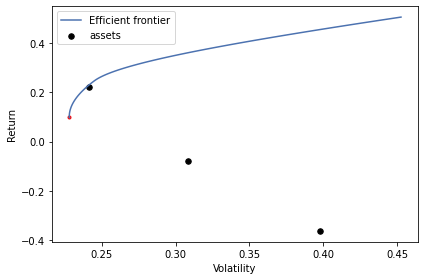

In [ ]:
ef = EfficientFrontier(mu, Sigma, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2] == 1)
fig, ax = plt.subplots()
ax.scatter(0.228, 0.102, marker=".", edgecolors="red", cmap="viridis_r")
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
print(stocks)

                 Apple       Amazon     Netflix
2021-03-15  123.257416  3081.679932  520.250000
2021-03-16  124.828087  3091.860107  524.030029
2021-03-17  124.022865  3135.729980  524.440002
2021-03-18  119.817863  3027.989990  504.790009
2021-03-19  119.281052  3074.959961  512.179993
...                ...          ...         ...
2022-03-08  157.440002  2720.290039  341.760010
2022-03-09  162.949997  2785.580078  358.790009
2022-03-10  158.520004  2936.350098  356.769989
2022-03-11  154.729996  2910.489990  340.320007
2022-03-14  150.619995  2837.060059  331.010010

[253 rows x 3 columns]


In [ ]:
print(stocks.corr())

            Apple    Amazon   Netflix
Apple    1.000000 -0.047361  0.009987
Amazon  -0.047361  1.000000  0.681852
Netflix  0.009987  0.681852  1.000000


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
stocks_pca = pca.fit_transform(stocks)


In [ ]:
print(stocks_pca)


[[ 2.28714338e+02  5.10969972e+01 -2.63898373e+01]
 [ 2.17880050e+02  5.17801040e+01 -2.47951152e+01]
 [ 1.75789441e+02  3.93870674e+01 -2.52140552e+01]
 [ 2.84567328e+02  5.18700845e+01 -3.00364326e+01]
 [ 2.37479372e+02  4.52563165e+01 -3.02827969e+01]
 [ 1.99954460e+02  4.53243733e+01 -2.67750579e+01]
 [ 1.70987366e+02  4.90154699e+01 -2.75931853e+01]
 [ 2.23381481e+02  4.99879105e+01 -3.02276160e+01]
 [ 2.67651378e+02  4.47072307e+01 -2.97788067e+01]
 [ 2.60622259e+02  4.80040096e+01 -2.92027362e+01]
 [ 2.36232074e+02  4.67524134e+01 -2.89157813e+01]
 [ 2.55944106e+02  5.21373819e+01 -3.05700462e+01]
 [ 2.16434801e+02  4.88005042e+01 -2.81323652e+01]
 [ 1.47246612e+02  4.63257452e+01 -2.70019292e+01]
 [ 8.40113698e+01  2.84453559e+01 -2.35523602e+01]
 [ 8.56721965e+01  3.29905191e+01 -2.33386902e+01]
 [ 3.18002990e+01  1.92013137e+01 -2.12042560e+01]
 [ 1.05512938e+01  2.07136290e+01 -1.87151423e+01]
 [-5.93925713e+01  2.43802095e-01 -1.54504677e+01]
 [-6.55401676e+01 -4.30313114e+

In [ ]:
print(pca.explained_variance_ratio_)

[0.92365297 0.0704254  0.00592163]
